<a href="https://colab.research.google.com/github/zile56/ElevvoPathways/blob/main/StudentScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Missing values before cleaning:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Data types:
 Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level    

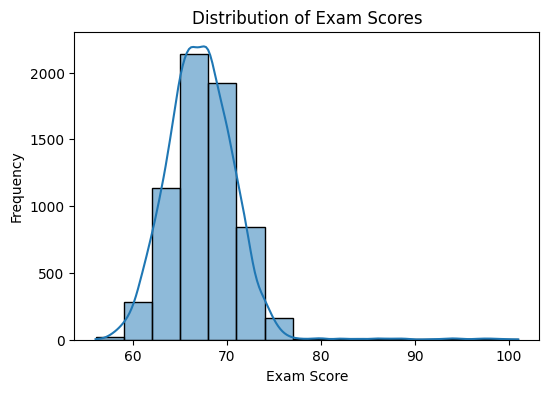

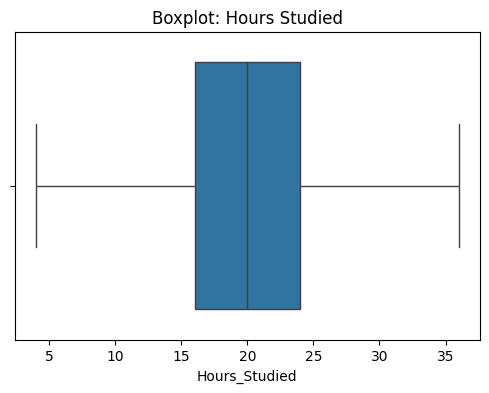

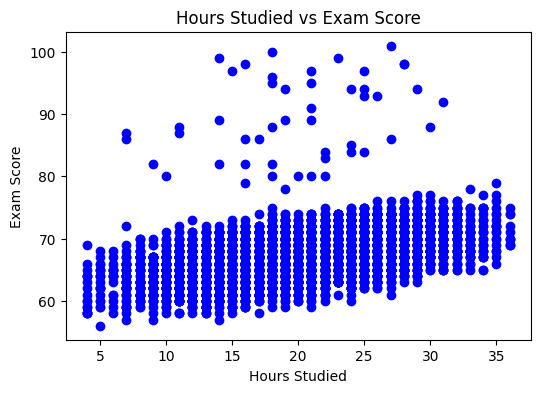

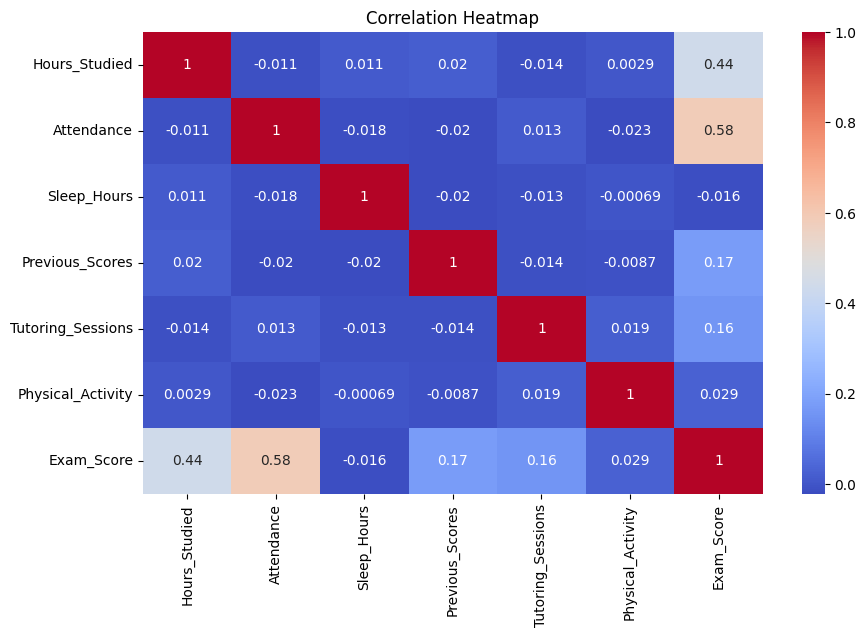

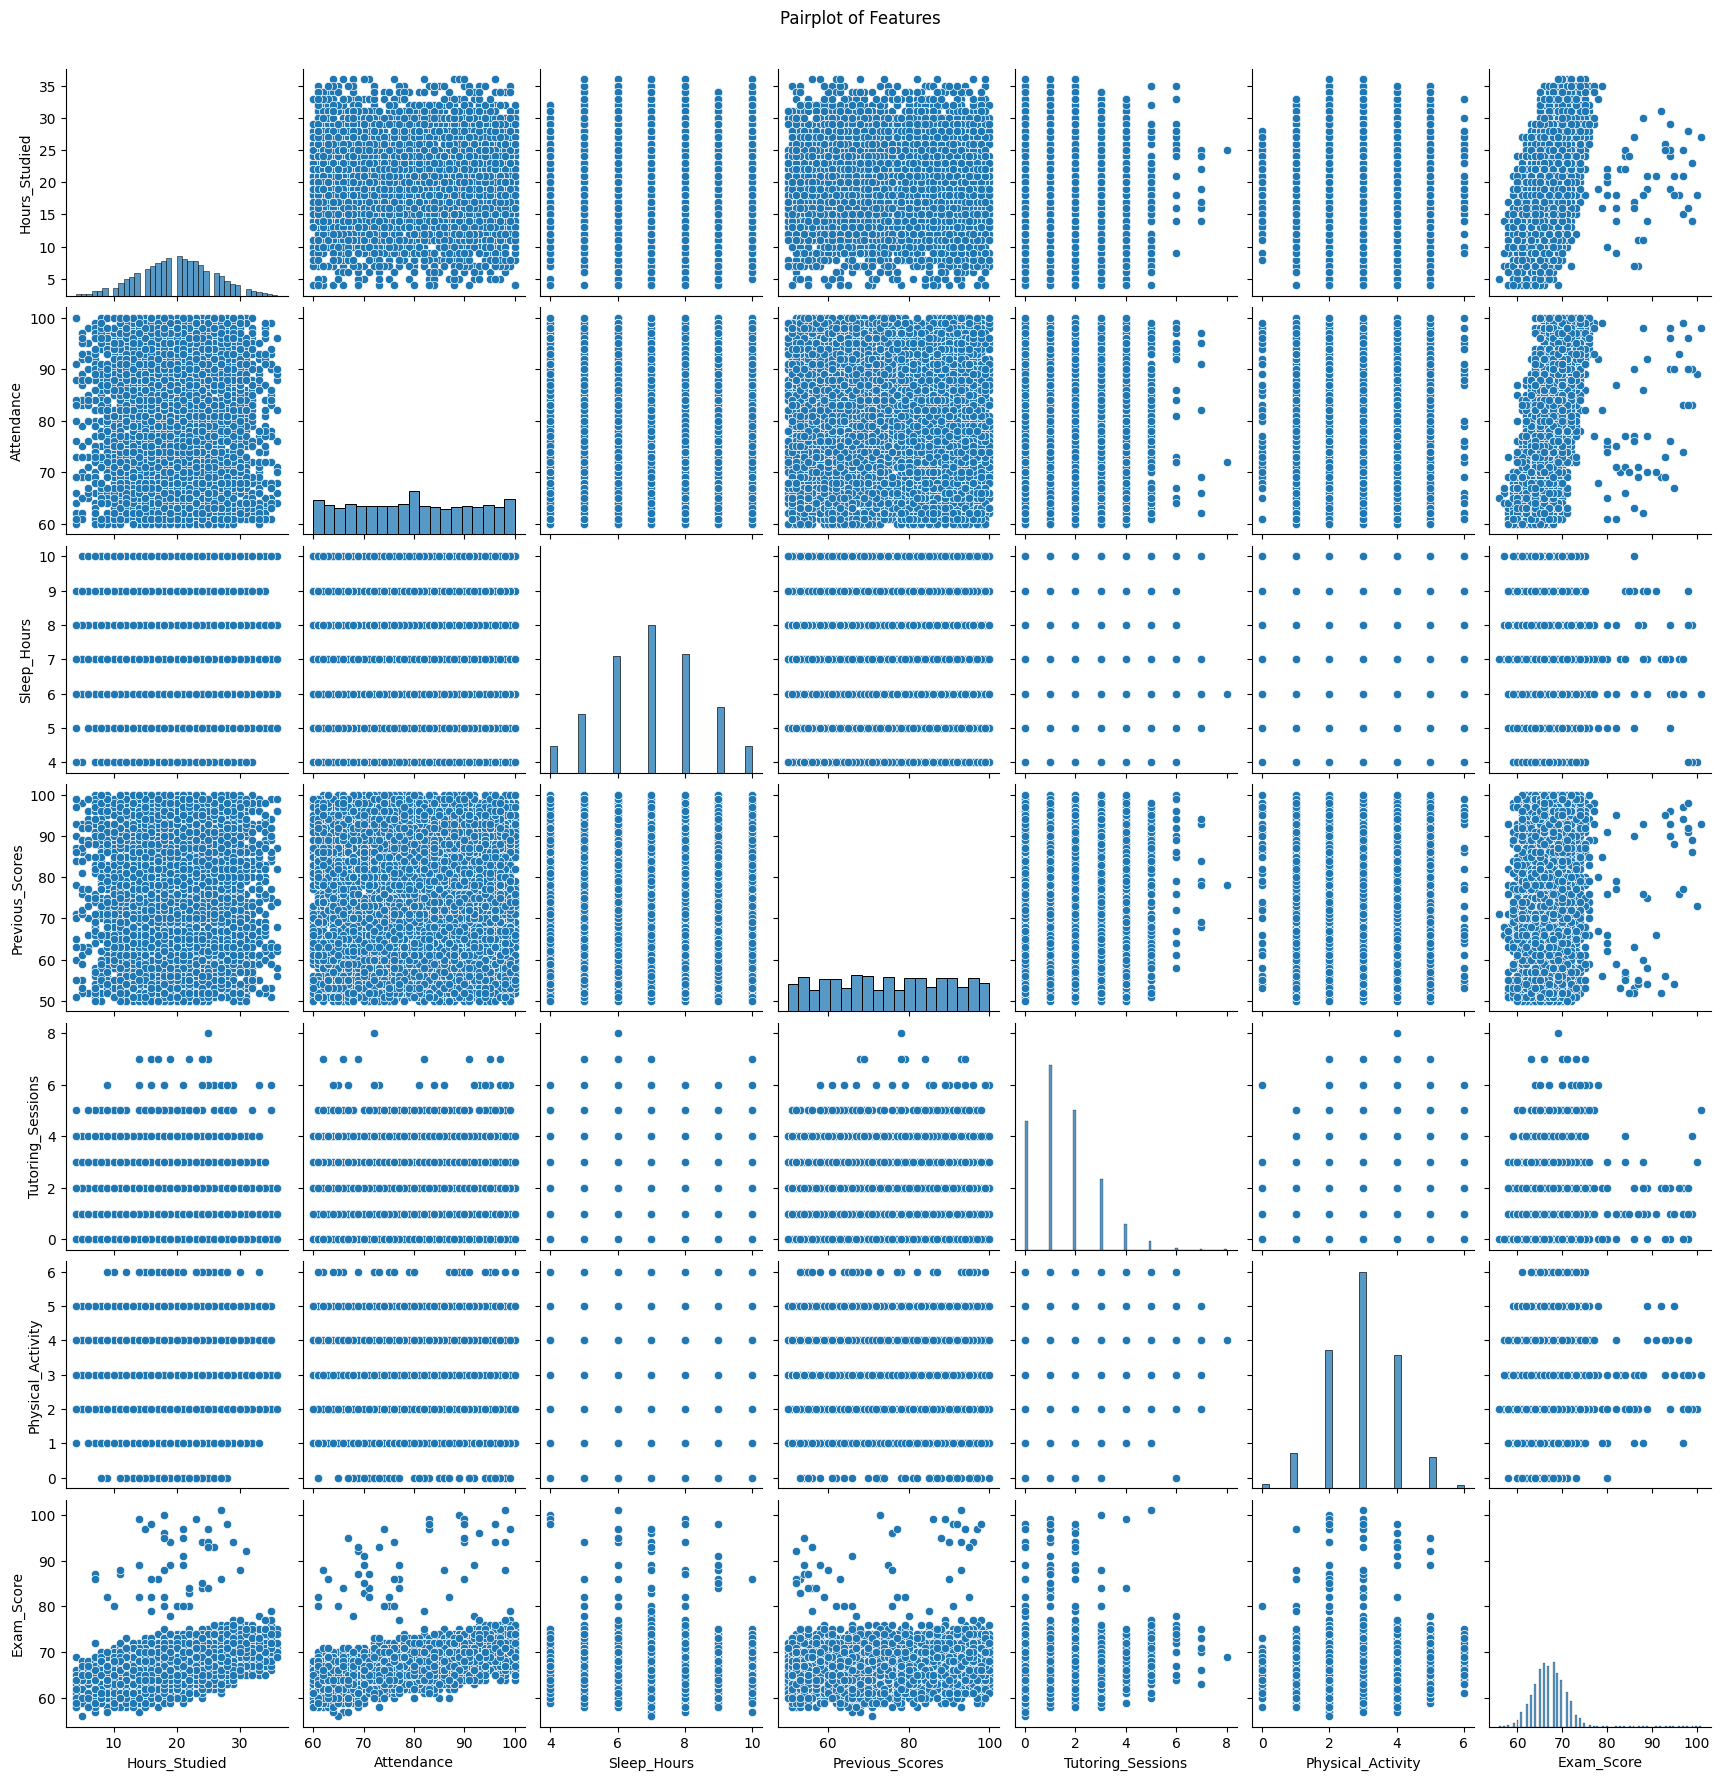


--- Linear Regression Results ---
Mean Squared Error: 12.13686650629317
R2 Score: 0.2016461583360798


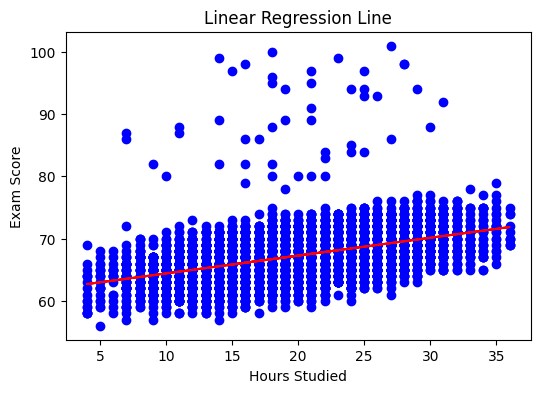

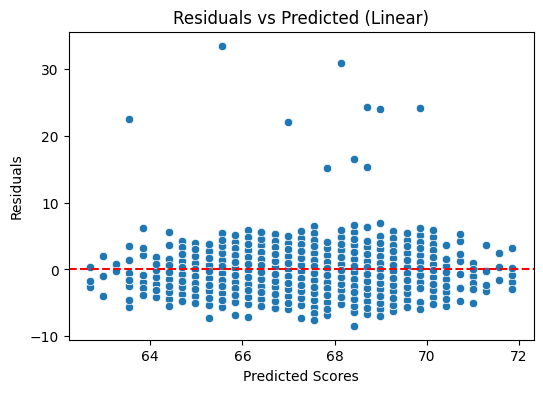


--- Polynomial Regression Results (Degree=2) ---
R2 Score: 0.20183229487431287

--- Decision Tree Regression Results ---
R2 Score: 0.2024333273789075

--- Model Summary ---
Linear Model Coefficient: 0.29
Intercept: 61.54
Linear R2 Score: 0.20
Enter hours studied: 6
Predicted exam score for 6.0 hours of study: 63.26


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# 1. Load dataset
df = pd.read_csv("/content/sample_data/StudentPerformanceFactors.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

# 2. ===== DATA CLEANING =====
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Outlier removal using IQR
Q1 = df['Hours_Studied'].quantile(0.25)
Q3 = df['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Hours_Studied'] >= Q1 - 1.5 * IQR) & (df['Hours_Studied'] <= Q3 + 1.5 * IQR)]

# Check types
print("\nData types:\n", df.dtypes)
print("\nData shape after cleaning:", df.shape)

# 3. ===== VISUALIZATION =====

# (a) Distribution of Exam Scores
plt.figure(figsize=(6, 4))
sns.histplot(df['Exam_Score'], kde=True, bins=15)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# (b) Boxplot - Hours Studied
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Hours_Studied'])
plt.title('Boxplot: Hours Studied')
plt.show()

# (c) Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score')
plt.show()

# (d) Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# (e) Pairplot
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# 4. ===== MODELING =====

# Prepare features
X = df[['Hours_Studied']]
y = df['Exam_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Evaluation
print("\n--- Linear Regression Results ---")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score:", r2_score(y_test, y_pred_lin))

# Plot regression line
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue')
plt.plot(X, lin_model.predict(X), color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression Line')
plt.show()

# Residual plot
residuals = y_test - y_pred_lin
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_lin, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Linear)')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.show()

# 5. ===== POLYNOMIAL REGRESSION =====

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)
y_pred_poly = poly_model.predict(X_test_p)

print("\n--- Polynomial Regression Results (Degree=2) ---")
print("R2 Score:", r2_score(y_test_p, y_pred_poly))

# 6. ===== DECISION TREE REGRESSION =====

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n--- Decision Tree Regression Results ---")
print("R2 Score:", r2_score(y_test, y_pred_tree))

# 7. ===== SAVE LINEAR MODEL =====
joblib.dump(lin_model, 'linear_model.pkl')

# 8. ===== SUMMARY =====
print("\n--- Model Summary ---")
print(f"Linear Model Coefficient: {lin_model.coef_[0]:.2f}")
print(f"Intercept: {lin_model.intercept_:.2f}")
print(f"Linear R2 Score: {r2_score(y_test, y_pred_lin):.2f}")

# 9. ===== PREDICTION =====
hours = float(input("Enter hours studied: "))
predicted_score = lin_model.predict([[hours]])
print(f"Predicted exam score for {hours} hours of study: {predicted_score[0]:.2f}")
